## Índice<a name="indice"></a>
* [1 Prepocesado de datos](#1)
    * [1.1 Importación de librerías](#1_1)
    * [1.2 Carga del Dataset](#1_2)
* [2 Análisis Exploratorio de datos](#2)
    * [2.1 Estadísitcas descriptivas](#2_1)
    * [2.2 Detección de Outliers](#2_2)
    * [2.3 Detección de correlaciones](#2_3)
* [3 Diseño de características](#3)
    * [3.1 Tratamiento de datos nulos](#3_1)
    * [3.2 Transformación de características](#3_2)
    * [3.3 Selección de características relevante](#3_3)
    * [3.4 Tratamiento de outliers](#3_4)
    * [3.5 Tratamiento de correlación](#3_5)
    * [3.6 Normalización](#3_6)


# 1 Prepocesado de datos<a name="1"></a>
[Índice](#indice)

Fuente: https://archive.ics.uci.edu/ml/datasets/automobile
### Describir columnas 
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz,  mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

## 1.1 Importación de librerías<a name="1_1"></a>
[Índice](#indice)

In [1]:
# Análisis
import pandas as pd
import numpy as np
# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 Carga del dataset<a name="1_2"></a>
[Índice](#indice)

In [2]:
# Descargar ficheros
# Cargar el csv
df = pd.read_csv('02_autos/imports-85.data')

In [3]:
# Mostrar el dataframe
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
# ¿Observas algo raro?
# Dos cosas:
# 1.- Que aparecen ? en los datos que faltan. Los pondremos como nulos cuando hagamos el 
#     diseño de características
# 2.- Que no tenemos los encabezados de columnas

In [5]:
# Incorpora lo que falta
nombres = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style',
'drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type',
'num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower',
'peak-rpm','city-mpg','highway-mpg','price']
# Para cargar las columnas al cargar el dataframe
#df =  pd.read_csv('02_autos/imports-85.data', names=nombres)
#df

# Otra forma de cargar las columnas con el df ya cargado
df.columns = nombres
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# 2 Análisis Exploratorio de datos<a name="2"></a>
[Índice](#indice)

In [6]:
# ¿Cuántas filas y cuántas columnas tiene df?
df.shape

(204, 26)

In [7]:
# Guarda en dos variables los datos anteriores
filas=df.shape[0]
cols= df.shape[1]
print(f"Filas:{filas}\tColumnas:{cols}")

Filas:204	Columnas:26


In [8]:
# ¿De qué tipos de datos son las columnas del df?
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [9]:
# Muestras los 10 primeros registros de df, pero solamente las columnas numéricas 
df.select_dtypes(exclude=object).head(10)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
2,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
3,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
4,2,99.8,177.3,66.3,53.1,2507,136,8.5,19,25
5,1,105.8,192.7,71.4,55.7,2844,136,8.5,19,25
6,1,105.8,192.7,71.4,55.7,2954,136,8.5,19,25
7,1,105.8,192.7,71.4,55.9,3086,131,8.3,17,20
8,0,99.5,178.2,67.9,52.0,3053,131,7.0,16,22
9,2,101.2,176.8,64.8,54.3,2395,108,8.8,23,29


In [10]:
# Muestras los 10 primeros registros de df, pero solamente las columnas no numéricas 
df.select_dtypes(include=object).tail(10)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
194,74,volvo,gas,std,four,wagon,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,13415
195,103,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,15985
196,74,volvo,gas,std,four,wagon,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,16515
197,103,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.62,3.15,162,5100,18420
198,74,volvo,gas,turbo,four,wagon,rwd,front,ohc,four,mpfi,3.62,3.15,162,5100,18950
199,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,16845
200,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300,19045
201,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500,21485
202,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.40,106,4800,22470
203,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,22625


## 2.1Estadísticas descriptivas<a name="2_1"></a>
[Índice](#indice)

In [11]:
# Averigua el valor mínimo, el máximo, 
# la media, la desviación típica, Q1, Q2 y Q3 de la variable curb-weight
df['curb-weight'].describe()

count     204.000000
mean     2555.602941
std       521.960820
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2939.250000
max      4066.000000
Name: curb-weight, dtype: float64

In [12]:
# Muéstralo en un mensaje usando funciones para cada dato anterior
min = df['curb-weight'].min()
max = df['curb-weight'].max()
media = df['curb-weight'].mean()
std = df['curb-weight'].std()
q1 = df['curb-weight'].quantile(0.25)
q2 = df['curb-weight'].quantile(0.50)
q3 = df['curb-weight'].quantile(0.75)
print(f'Mínimo:{min}\nMáximo:{max}\nMedia:{media}\nStd:{std}\nQ1:{q1}\nQ2:{q2}\nQ3:{q3}\n')

Mínimo:1488
Máximo:4066
Media:2555.6029411764707
Std:521.9608201055871
Q1:2145.0
Q2:2414.0
Q3:2939.25



In [13]:
# Muestra las estadísitcas descriptivas de todas las variables numéricas. 
df.describe(exclude=object)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [14]:
# ¿Crees que el tipo de datos de algunas de ellas es incorrecto?
# Sí,la columna symboling tiene tipo de dato numérico, pero realmente, 
# es una clasificación, por lo que podríamos asignarle tipo object.

In [15]:
# ¿Cuántos valores distintos hay para la variable num-of-doors?
df['num-of-doors'].value_counts()

four    114
two      88
?         2
Name: num-of-doors, dtype: int64

In [16]:
# Hay tres valores distintos: four, two y ? 
# (? cuando no se conoce cuántas puertas tiene el coche)

In [17]:
# ¿cuál es el más moda de esta variable? 
df['num-of-doors'].mode()
# La moda es four. También podemos verlo en el punto anterior
df['num-of-doors'].value_counts().idxmax()

'four'

In [18]:
# ¿Cuántos registros tiene como num-of-doors la moda?
df['num-of-doors'].value_counts().iloc[0]

114

In [19]:
# Muestra las estadísticas descriptivas de todas las variables no numéricas. 
df.describe(include=object)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,186
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,40,32,184,167,114,96,120,201,148,158,93,23,20,19,37,4


In [20]:
#¿Crees que el tipo de datos de algunas de ellas es incorrecto?
# Sí, las variables normalized-losses, bore, stroke, horsepower, 
# peak-rpm y price deberían ser numéricas. Pandas les ha asignado tipo object
# porque hay ? en los datos que faltan.

In [21]:
# ¿Cuáles son los posibles valores de la variable make?
df.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64

In [22]:
# ¿Cuál es la marca de la que más vehículos hay? ¿moda?
df['make'].value_counts().idxmax()

'toyota'

In [23]:
# ¿Qué % de vehículos hay de cada tipo de combustible?
df['fuel-type'].value_counts()*100/filas

gas       90.196078
diesel     9.803922
Name: fuel-type, dtype: float64

<AxesSubplot:title={'center':'Nº de Vehículos por marca'}>

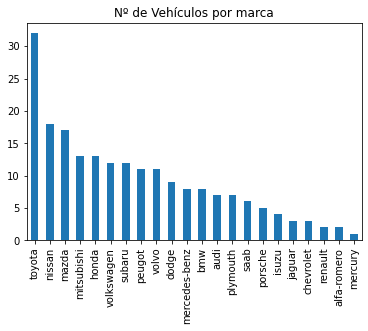

In [24]:
# Crea un diagrama de barras para mostrar el nº de vehículos por marca. 
# Hazlo con pandas. Debes poner un título a la gráfica
df.make.value_counts().plot.bar(title='Nº de Vehículos por marca')

In [25]:
# ¿Cuáles son los posibles valores de la variable body-style?
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     5
Name: body-style, dtype: int64

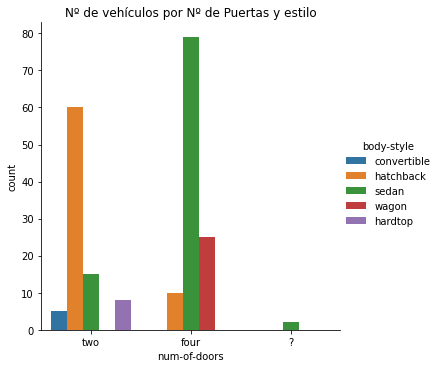

In [26]:
# Crea un diagrama de barras para mostrar el nº de vehículos 
# según su número de puertas, distinguiendo por estilo (body-style). 
# Hazlo con seaborn. Debes poner un título a la gráfica. 
sns.catplot(x='num-of-doors',kind='count', hue='body-style', data=df).set(
    title='Nº de vehículos por Nº de Puertas y estilo')

In [27]:
# ¿Hay coches de tipo convertible de 4 puertas?
# No, porque en el diagrama vemos que no hay barra azul para 4 puertas

In [28]:
# Sacar los mismos datos sin usar gráficas
df.groupby(['num-of-doors'])['body-style'].value_counts()

num-of-doors  body-style 
?             sedan           2
four          sedan          79
              wagon          25
              hatchback      10
two           hatchback      60
              sedan          15
              hardtop         8
              convertible     5
Name: body-style, dtype: int64

In [29]:
# Analiza las estadísticas de la variable tamaño del motor según el tipo de 
# combustible
df.groupby('fuel-type')['engine-size'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel-type,,,,,,,,
diesel,20.0,135.700000,32.115089,97.0,108.25,139.5,152.0,183.0
gas,184.0,125.934783,42.621297,61.0,97.00,110.5,141.0,326.0


In [30]:
# Idem pero agrupando también por la variable aspiration
df.groupby(['fuel-type','aspiration'])['engine-size'].describe()

count        mean        std   min    25%    50%  \
fuel-type aspiration                                                     
diesel    std           7.0  110.428571  13.575187  97.0  100.0  110.0   
          turbo        13.0  149.307692  31.108371  97.0  145.0  152.0   
gas       std         160.0  125.393750  44.841594  61.0   97.0  110.0   
          turbo        24.0  129.541667  23.183538  98.0  109.5  130.5   

                         75%    max  
fuel-type aspiration                 
diesel    std         116.00  134.0  
          turbo       183.00  183.0  
gas       std         140.25  326.0  
          turbo       144.75  181.0

[Text(0.5, 1.0, 'Media Consumo Ciudad')]

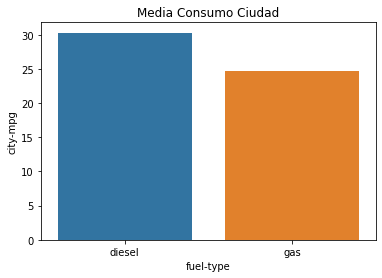

In [31]:
# Muestra en un diagrama de barras la media de consumo por ciudad 
# según el tipo de combustible
consumo=df.groupby('fuel-type')['city-mpg'].mean().reset_index()
sns.barplot(x='fuel-type',y='city-mpg',data=consumo).set(
    title='Media Consumo Ciudad')

In [32]:
# ¿Qué conclusión obtienes de esta gráfica?
# Que el consumo en ciudad de los diesel es mayor que los de gasolina

[Text(0.5, 1.0, 'Media Consumo Ciudad')]

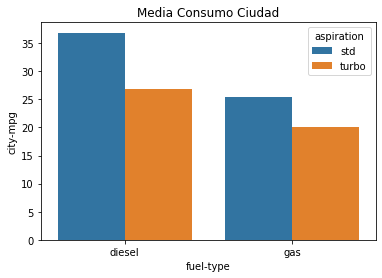

In [33]:
# Idem al anterior pero agrupando además por aspiration
consumo=df.groupby(['fuel-type','aspiration'])['city-mpg'].mean().reset_index()
sns.barplot(x='fuel-type',y='city-mpg', hue='aspiration', 
            data=consumo).set(title='Media Consumo Ciudad')

In [34]:
# ¿Qué conclusión obtienes de esta gráfica?
# Que el consumo en ciudad de los diesel es mayor que los de gasolina y que
# los coches con turbo consumen menos.

In [35]:
# Muestra cuántos vehículos hay de los que se consideran de más riesgo (symboling=3)
filtro = df['symboling']==3
df[filtro].shape[0]

26

In [36]:
# Muestra los modelos de los vehículos que se consideran de más riesgo (symboling=3)
df[filtro]['body-style'].value_counts()

hatchback      20
convertible     4
hardtop         2
Name: body-style, dtype: int64

In [37]:
# ¿Qué % representan estos vehículos frente al total de vehiculos?
df[filtro]['body-style'].value_counts()*100/filas

hatchback      9.803922
convertible    1.960784
hardtop        0.980392
Name: body-style, dtype: float64

<AxesSubplot:title={'center':'Análisis de Distribución Normal'}, ylabel='Density'>

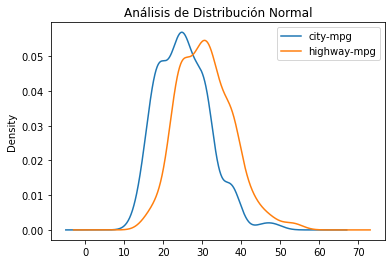

In [38]:
# Muestra en una unica figura el gráfico de densidad de las variables consumo 
# en ciudad y carretera y valora si siguen una distribución normal
# Con pandas
df[['city-mpg','highway-mpg']].plot.kde(title='Análisis de Distribución Normal')

In [39]:
# Se parece a una campana de gauss, pero habría que estudiralo
# más en profundidad usando otra técnicas

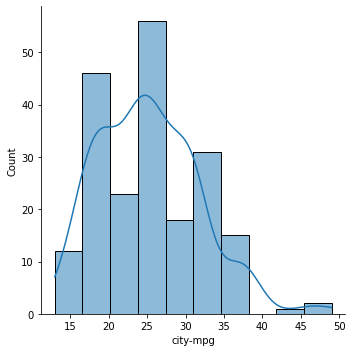

In [40]:
# con seaborn
sns.displot(x='city-mpg',kde=True,data=df)

<AxesSubplot:>

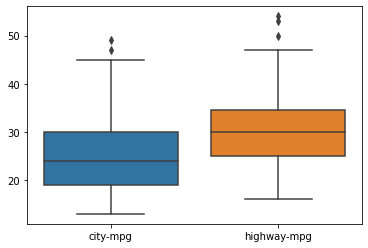

In [41]:
# Representa con seaborn los diagramas de cajas y bigotes de de las 
# variables consumo en ciudad y carretera. 
sns.boxplot(data=df[['city-mpg','highway-mpg']])

In [42]:
# ¿Qué conclusiones obtines de esta gráfica?
#1.- Que hay valores atípico por encima del máximo para las dos variables
#2.- Que el consumo en carretera es más simétrico que en ciudad por lo
# que podemos decir que se asemaja más a la distribución normal
#3.- Que los valores del consumo en carretera son mayores que los de ciudad

## 2.2. Detección de outliers<a name="2_2"></a>
[Índice](#indice)

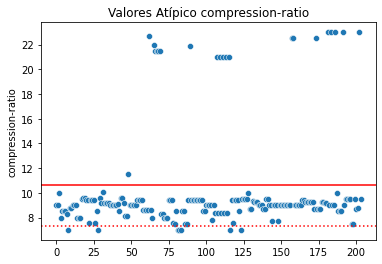

In [43]:
# Representa los outliers de la variable compression-ratio usando 
# una gráfica de dispersión de seaborn. 
# Dibuja las líneas de máximum y mínimum
Q1=df['compression-ratio'].quantile(0.25)
Q3=df['compression-ratio'].quantile(0.75)
IQR=Q3-Q1
minimum=Q1-1.5*IQR
maximum=Q3+1.5*IQR
sns.scatterplot(x=df.index,y='compression-ratio',data=df).set(title='Valores Atípico compression-ratio')
plt.axhline(y=minimum,color='r',linestyle=':')
plt.axhline(y=maximum,color='r',linestyle='-')

In [44]:
# Conclusión: Existen outliers tanto por arriba como por abajo

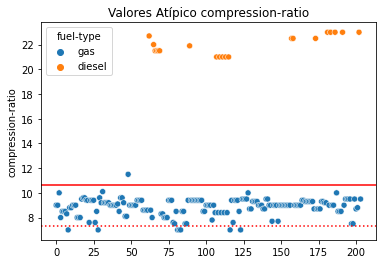

In [45]:
# Idem pero que se distinga por tipo de combustible
sns.scatterplot(x=df.index,y='compression-ratio',hue='fuel-type',data=df).set(title='Valores Atípico compression-ratio')
plt.axhline(y=minimum,color='r',linestyle=':')
plt.axhline(y=maximum,color='r',linestyle='-')

In [46]:
# Conclusión: Casi todos los outluers por encima corresponden a vehículos diesel. 
# Todos los que están por debajo, corresponde a vehículos de gasolina

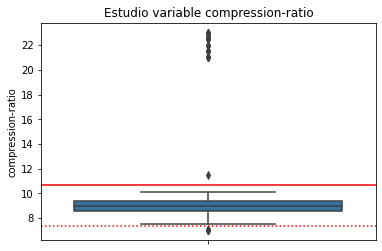

In [47]:
# Representa los outliers de la variable de compression-ratio usando una gráfico de cajas. 
# Dibuja las líneas de máximum y mínimum
sns.boxplot(y='compression-ratio', data=df).set(title='Estudio variable compression-ratio')
plt.axhline(y=minimum,color='r',linestyle=':')
plt.axhline(y=maximum,color='r',linestyle='-')

[Text(0.5, 1.0, 'Estudio variable compression-ratio')]

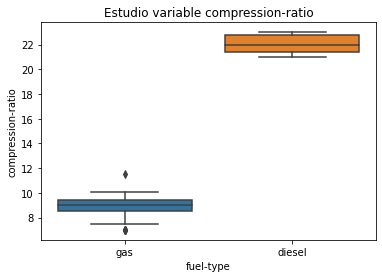

In [48]:
# Idem pero que se distinga por tipo de combustible
sns.boxplot(y='compression-ratio', x='fuel-type', data=df).set(title='Estudio variable compression-ratio')

In [49]:
# Conclusión: 
# El compresion-ratio de diesel es mayor que en gas. En realidad, no tiene sentido comparar 
# los valores según el tipo de combustible.
# No debemos pintar máximo y mínimo en esta gráfica ya que está calculado sin 
# distinguir por tipo de motor. Deberíamos pintar el mínimo y el máximo de cada tipo de motor.

[Text(0.5, 1.0, 'Estudio variable compression-ratio')]

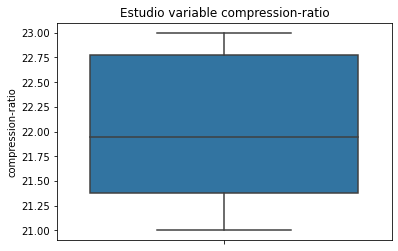

In [50]:
# Pintar compresion-ratio solamente de los motores diesel
filtro = df['fuel-type']=='diesel'
sns.boxplot(y='compression-ratio', data=df[filtro]).set(title='Estudio variable compression-ratio')

[Text(0.5, 1.0, 'Estudio variable compression-ratio')]

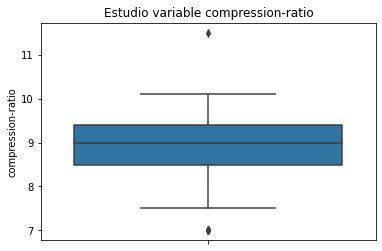

In [51]:
# Pintar compresion-ratio solamente de los motores gasolina
filtro = df['fuel-type']=='gas'
sns.boxplot(y='compression-ratio', data=df[filtro]).set(title='Estudio variable compression-ratio')

## 2.3 Detección de correlaciones<a name="2_3"></a>
[Índice](#indice)

Text(0.5, 1.05, 'Análisis de correlación')

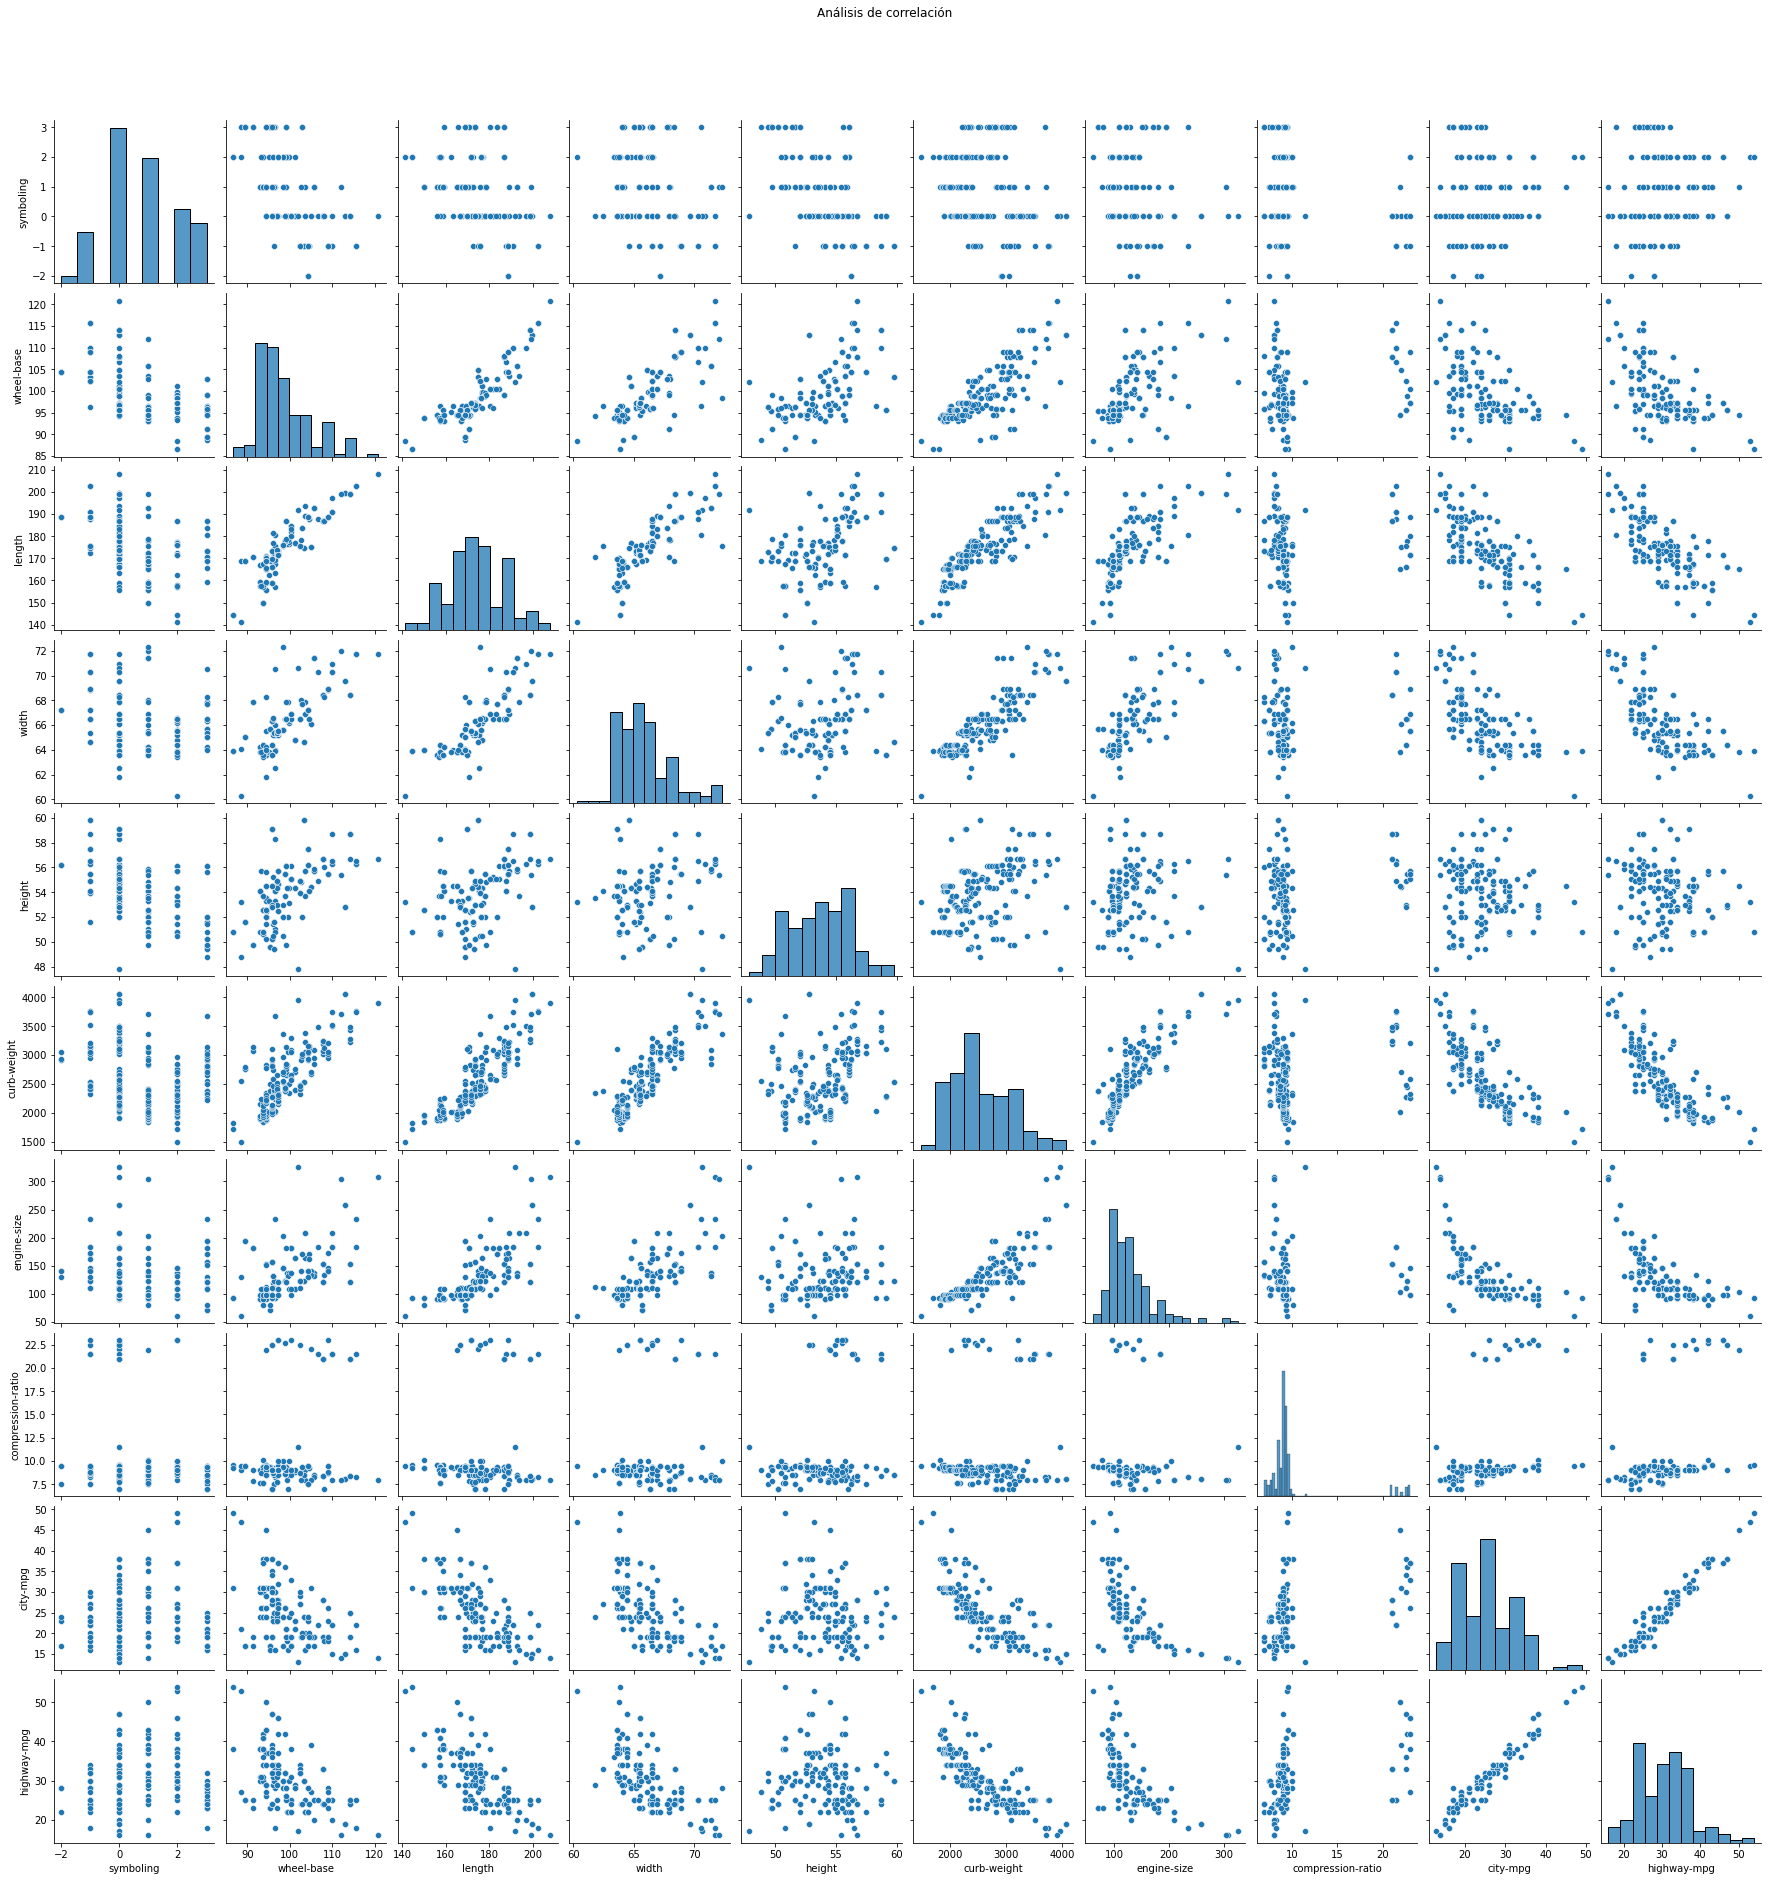

In [52]:
# Estudiando la matriz de dispersión con seaborn, cuáles son las correlaciones que detectas?
sns.pairplot(data=df).fig.suptitle('Análisis de correlación',y=1.05)

In [53]:
# wheel-base/lenght
# wheel-base/width
# curb-weight/lenght
# curb-weight/width
# engine-size/curb-weight
# city-mpg/lenght
# city-mpg/engine-size
# city-mpg/curb-weight
# city-highway/lenght
# city-highway/width
# city-highway/engine-size
# city-highway/curb-weight

<AxesSubplot:>

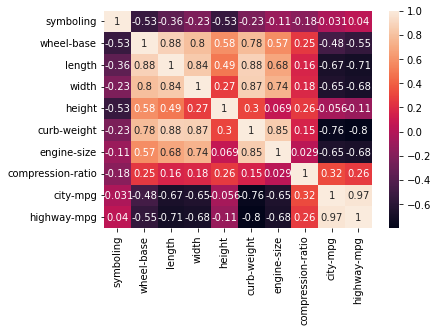

In [54]:
# Representa una mapa de calor de la matriz de correlación, ¿qué correlaciones hay?
sns.heatmap(data=df.corr(),annot=True)

In [55]:
# Añadimos a las anteriores:
# lenght/width
# city-mpg/highway-mpg
# Quitamos de las anteriores:
# city-highway/engine-size

# 3 Diseño de características<a name="3"></a>
[Índice](#indice)

## 3.1 Tratamiento de datos nulos<a name="3_1"></a>
[Índice](#indice)

In [56]:
# Ver si hay nulos
df.isnull().sum()
# No hay valores nulos

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [57]:
# Buscar nulos representados por '?', '-', '0'
df.isin(['?', '-', '0']).sum()
# Hay valores faltantes en normalized-losses,num-of-doors, bore, stroke,horsepower,peak-rpm,price

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [58]:
# ¿Hay valores 0 en alguna columna numérica?
df.isin(['?']).sum()
# No

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [59]:
# Vamos a transformar las ? por nulos
df.replace('?',np.nan,inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [60]:
#Comprobar nulos
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
# Transforma valores nulos
# normalized-losses, bore, stroke, horsepower, peak-rpm, price los reemplazamos por su media
# num-of-doors por su moda

#normalized-losses
# Como el tipo de datos de normalized-losses es object, no podemos calcular la media. Antes tenemos que transformar
# el tipo de datos de esta columna de object a float
df['normalized-losses']=df['normalized-losses'].astype('float')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [65]:
# Media normalized-losses
df['normalized-losses'].mean()

122.0

In [66]:
# Reemplazar los nulos de normalized-losses por su media
df['normalized-losses'].replace(np.nan,df['normalized-losses'].mean(),inplace=True)
df['normalized-losses']

0      122.0
1      122.0
2      164.0
3      164.0
4      122.0
       ...  
199     95.0
200     95.0
201     95.0
202     95.0
203     95.0
Name: normalized-losses, Length: 204, dtype: float64

In [75]:
# Para variable nº de puertas vamos a transformar los nulos por la moda ya que esta variable
# es categórica. En este caso no hay que transformar el tipo de datos de la variable
df['num-of-doors'].replace(np.nan,df['num-of-doors'].mode()[0],inplace=True)

In [77]:
# El resto de variables, al ser numéricas,las vamos a cambiar el tipo y a asignar la media a los valores nulos
varNulas = ['bore','stroke','horsepower','peak-rpm','price']
for c in varNulas:
    #Cambiar tipo de datos
    df[c]=df[c].astype('float')
    #Reemplazar nulos por la media
    df[c].replace(np.nan,df[c].mean(),inplace=True)

In [79]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

## 3.2 Transformación de características<a name="3_2"></a>
[Índice](#indice)

## 3.3 Selección de características relevante<a name="3_3"></a>
[Índice](#indice)

## 3.4 Tratamiento de outliers<a name="3_4"></a>
[Índice](#indice)

## 3.5 Tratamiento de correlación<a name="3_5"></a>
[Índice](#indice)

## 3.6 Normalización<a name="3_6"></a>
[Índice](#indice)